# 基础

In [30]:
import torch
import numpy as np

## Tensor与numpy、cuda转换

In [24]:
a = torch.Tensor([[1, 2], [3, 4], [5,6]])
a

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [23]:
np_a = a.numpy()
np_a

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)

In [26]:
torch_a = torch.from_numpy(np_a)
torch_a

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [28]:
b = torch_a.float()
b

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [29]:
if torch.cuda.is_available():
    a_cuda = a.cuda()
    print(a_cuda)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], device='cuda:0')


## Variable

In [32]:
a = torch.Tensor([[1, 2], [3, 4], [5,6]])
Variable(a)
a

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

标量求导

In [34]:
x = Variable(torch.Tensor([3]), requires_grad = True)
w = Variable(torch.Tensor([4]), requires_grad = True)
b = Variable(torch.Tensor([5]), requires_grad = True)
y = w * x + b
y.backward()#表示自动求导y.backward()(torch.FloatTensor([1]))，因为标量求导里面的参数可以不用写
print (x.grad, w.grad, b.grad)

tensor([4.]) tensor([3.]) tensor([1.])


矩阵求导

## Dataset

In [35]:
dataiter = DataLoader(myDataset, batch_size = 32, shuffle = True, collate_fn = default_collate)

NameError: name 'DataLoader' is not defined

# Pytorch与Numpy转换

https://blog.csdn.net/nanxiaoting/article/list/2?t=1&

In [18]:
import torch
import numpy as np

In [4]:
numpy_data = np.arange(15).reshape(3,5)
print ('numpy_data\n',numpy_data)
torch_data = torch.from_numpy(numpy_data)
print ('torch_data\n',torch_data)
numpy_data1 = torch_data.numpy()
print ('numpy_data1\n',numpy_data1)

numpy_data
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
torch_data
 tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]], dtype=torch.int32)
numpy_data1
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


## 构建torch矩阵

In [5]:
data = torch.Tensor(3,5)   #构建一个3×5未初始化的矩阵
print (data)
 
data1 = torch.rand(5,3)    #构建一个随机初始化的矩阵
print (data1)
print (data1.size())

tensor([[9.9184e-39, 9.0000e-39, 1.0561e-38, 1.0653e-38, 4.1327e-39],
        [8.9082e-39, 9.8265e-39, 9.4592e-39, 1.0561e-38, 1.0653e-38],
        [1.0469e-38, 9.5510e-39, 1.0102e-38, 8.4490e-39, 1.0653e-38]])
tensor([[0.0799, 0.3616, 0.9739],
        [0.2280, 0.6707, 0.9384],
        [0.3383, 0.6736, 0.2419],
        [0.1628, 0.8922, 0.5902],
        [0.1464, 0.9181, 0.8001]])
torch.Size([5, 3])


## 加法运算

In [8]:
x = torch.rand(5,3)
y = torch.rand(5,3)
 
print ('1\n', x + y)
print ('2\n', torch.add(x,y))

#提供一个输出作为参数
result = torch.Tensor(5,3)
torch.add(x,y,out=result)
print ('3\n', result)
 
#就地操作
y.add_(x)
print ('4\n', y)

1
 tensor([[1.4765, 1.2106, 1.2076],
        [1.7050, 1.0308, 1.0145],
        [1.0036, 1.3928, 1.3611],
        [1.1624, 0.5930, 0.9226],
        [1.1395, 1.2307, 0.9401]])
2
 tensor([[1.4765, 1.2106, 1.2076],
        [1.7050, 1.0308, 1.0145],
        [1.0036, 1.3928, 1.3611],
        [1.1624, 0.5930, 0.9226],
        [1.1395, 1.2307, 0.9401]])
3
 tensor([[1.4765, 1.2106, 1.2076],
        [1.7050, 1.0308, 1.0145],
        [1.0036, 1.3928, 1.3611],
        [1.1624, 0.5930, 0.9226],
        [1.1395, 1.2307, 0.9401]])
4
 tensor([[1.4765, 1.2106, 1.2076],
        [1.7050, 1.0308, 1.0145],
        [1.0036, 1.3928, 1.3611],
        [1.1624, 0.5930, 0.9226],
        [1.1395, 1.2307, 0.9401]])


## 切片以及view方法

In [17]:
numpy_data = np.arange(16).reshape(4,4)
x = torch.from_numpy(numpy_data)

print ('----x\n', x)
print ('----x[:,1]\n', x[:,1])  #索引操作
y = x.view(16)
print ('----x.view(16)\n', y)
z = x.view(-1,8)   #2*8
print ('----x.view(-1,8)\n', z)

----x
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]], dtype=torch.int32)
----x[:,1]
 tensor([ 1,  5,  9, 13], dtype=torch.int32)
----x.view(16)
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=torch.int32)
----x.view(-1,8)
 tensor([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15]], dtype=torch.int32)


创建tensor

In [18]:
x = torch.rand(4,4)
print (torch.is_tensor(x))   #返回True
print (torch.numel(x))     #返回16


#1.对角元素为1
y = torch.eye(3,4)   #对角元素为1，其余为0
print (y)
 
#2.从numpy.ndarray类创造一个tensor类
a = np.array([1,2,3])
t = torch.from_numpy(a)
print (t)
t[0] = -1
print (a)   #[-1  2  3],注意这种创造方式tensor 和ndarray共享相同的内存
 
#3.利用torch.linspace
b = torch.linspace(2,10,steps=10)  #注意step是start 和end 之间的样本数
print (b)
 
#4.torch.logspace() 返回10^start和10^end之间的对数间隔
c = torch.logspace(0.1,1.0,steps=5)
print (c)
 
#5.填充1
d = torch.ones(4,4)
print (d)
 
#6.torch.arange()
e = torch.arange(1,4)  #默认step = 1
print (e)
 
#7.torch.zeros()
f = torch.zeros(6)
print (f)
g = torch.zeros(2,3)
print (g)

True
16
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]])
tensor([1, 2, 3], dtype=torch.int32)
[-1  2  3]
tensor([ 2.0000,  2.8889,  3.7778,  4.6667,  5.5556,  6.4444,  7.3333,  8.2222,
         9.1111, 10.0000])
tensor([ 1.2589,  2.1135,  3.5481,  5.9566, 10.0000])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([1, 2, 3])
tensor([0., 0., 0., 0., 0., 0.])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 索引、切片、连接、换位

In [23]:
x = torch.randn(2,3)
print('x\n', x)
 
y = torch.cat((x,x),0) #竖着摞在一起
print ('y\n', y)
 
z = torch.cat((x,x),1)  #横着落在一起
print ('z\n', z)
 
#chunk在给定维度上将张量进行分块处理。chunks：要返回的分块的个数
g = torch.chunk(x,2,1)
print (g)
 
print ('--'*20)
#split 将输入张量分割成相同size的chunks。如果不能整分，则最后一块小于其他块
w = torch.split(z,3,dim=1)  #3:代表每个分块大小为3
print (w)
 
#stack沿着一个新的维度对输入张量进行连接
f = torch.stack((x,x),dim=0)
print (f)
 
#转置
e = torch.t(x)
print (e)

x
 tensor([[ 0.3068,  2.6857, -1.8967],
        [ 2.1063,  0.9491,  1.0888]])
y
 tensor([[ 0.3068,  2.6857, -1.8967],
        [ 2.1063,  0.9491,  1.0888],
        [ 0.3068,  2.6857, -1.8967],
        [ 2.1063,  0.9491,  1.0888]])
z
 tensor([[ 0.3068,  2.6857, -1.8967,  0.3068,  2.6857, -1.8967],
        [ 2.1063,  0.9491,  1.0888,  2.1063,  0.9491,  1.0888]])
(tensor([[0.3068, 2.6857],
        [2.1063, 0.9491]]), tensor([[-1.8967],
        [ 1.0888]]))
----------------------------------------
(tensor([[ 0.3068,  2.6857, -1.8967],
        [ 2.1063,  0.9491,  1.0888]]), tensor([[ 0.3068,  2.6857, -1.8967],
        [ 2.1063,  0.9491,  1.0888]]))
tensor([[[ 0.3068,  2.6857, -1.8967],
         [ 2.1063,  0.9491,  1.0888]],

        [[ 0.3068,  2.6857, -1.8967],
         [ 2.1063,  0.9491,  1.0888]]])
tensor([[ 0.3068,  2.1063],
        [ 2.6857,  0.9491],
        [-1.8967,  1.0888]])


# 自动微分

In [2]:
from torch.autograd import Variable

In [5]:
x = Variable(torch.ones(2,2),requires_grad=True)
print (x)
 
y = x + 2
print (y)
 
z = y*y*3
print (z)
 
out = z.mean()
print (out)
 
out.backward()
print (x.grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


# lenet-5

In [10]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 建立了两个卷积层，第一层1 个通道输入, 6个输出通道, 5x5 卷积核
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        #三个全连接层，y = Wx + b 这里没有做激活/非线性操作
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
 
    def forward(self, x): #2D卷积层的输入data维数是 batchsize*channel*height*width
        # 最大池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
 
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
 
net =Net()
print (net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [14]:
#网络的可学习参数通过net.parameters()返回
params = list(net.parameters())
print (len(params))
print (params[0].size())
 
input = Variable(torch.randn(1,1,32,32))
print ('input\n', input)
out = net(input)
print ('out\n', out)

10
torch.Size([6, 1, 5, 5])
input
 tensor([[[[-1.1598,  0.4353, -1.6216,  ...,  0.3026, -0.9534,  0.4917],
          [ 0.8890,  0.1429, -0.7760,  ..., -0.8602, -0.8688,  0.2656],
          [-0.7467, -0.6472,  0.0127,  ..., -0.8758,  1.4264, -0.7566],
          ...,
          [ 0.2706,  0.2323, -0.5308,  ..., -2.4984,  1.4747,  0.8925],
          [ 0.1134, -0.4392, -0.5797,  ...,  1.7504,  0.6505, -1.5175],
          [ 1.0208,  0.3804, -2.0117,  ...,  0.5702,  0.7984,  1.2758]]]])
out
 tensor([[-0.0980,  0.1168,  0.0109,  0.1165,  0.0606,  0.0732, -0.1705,  0.0735,
          0.0984,  0.0392]], grad_fn=<AddmmBackward>)


In [12]:

 
#将网络中所有的参数梯度清零
net.zero_grad()
out.backward(torch.randn(1,10))
 
#损失函数
output = net(input)
target = Variable(torch.arange(1,11))
criterion = nn.MSELoss()
 
loss = criterion(output,target)
print ('---' * 10)
print ('loss:\n',loss)
 
#反向传播
net.zero_grad() #将之前的梯度清零
print ('net.conv1.bias.grad brfore backward:')
print (net.conv1.bias.grad)
 
loss.backward()
print ('net.conv1.bias.grad after backward:')
print (net.conv1.bias.grad)
 
 
import  torch.optim as optim
 
#新建一个优化器，指定要调整的参数和学习率
optimizer = optim.SGD(net.parameters(),lr = 0.01)
optimizer.zero_grad()
output = net(input)
loss = criterion(output,target)
loss.backward()
optimizer.step() #更新参数

10
torch.Size([6, 1, 5, 5])
tensor([[[[ 2.1070,  0.8567, -1.4946,  ...,  0.9168, -0.9718, -1.0974],
          [ 1.1842, -0.5988, -0.5353,  ..., -0.7818,  0.1262, -0.5777],
          [-0.1366,  0.1679, -2.0917,  ..., -0.7635, -0.3512, -0.9805],
          ...,
          [ 0.8270, -1.6988, -0.3970,  ...,  0.4517,  1.1553, -0.1785],
          [-0.5153,  1.4486,  0.8712,  ...,  0.5687, -0.1226, -0.6955],
          [ 1.9352, -0.3933, -1.4994,  ..., -0.8233,  1.6277,  0.3588]]]])
tensor([[-0.1303,  0.1208, -0.0059,  0.1400,  0.0552,  0.0654, -0.1707,  0.0639,
          0.0967,  0.0663]], grad_fn=<AddmmBackward>)


RuntimeError: Expected object of scalar type Float but got scalar type Long for argument #2 'target'

# 一些操作

In [21]:
a = torch.Tensor(2,3)
print (a)
 ###
#表示方法
a[0]#表示第0行
a[:,0]#表示第0列
a[0][2]#表示第0行第2个元素，等价于a[0,2]
a[0,-1]#第0行，最后一个元素
a[:2]#表示前两行
a[:2,0:2]#前两行，第0,1列
a[0:1,:2]#第0行，前两列。与a[0,:2]形状不同
a[torch.LongTensor([0,1])]#第0和第1行
###

tensor([[0., 0., 0.],
        [0., 0., 0.]])


tensor([[0., 0., 0.],
        [0., 0., 0.]])

## 细节

In [40]:
a = torch.Tensor(2,3)
print (a)
 
b = torch.Tensor([[1,2,3],[4,5,6]])
print (b)
 
c = b.tolist()#转换成列表
print ('c\n', c)
 
print ('b.numel()\n', b.numel())
 
d = torch.Tensor(b.size())
print ('------d = torch.Tensor(b.size())------\n', d)

b = a.view(-1,6)
print ('b = a.view(-1,6)------\n', b)
 
e = torch.unsqueeze(a,1)  #在第一维上增加1，变成2*1*3 （从0开始）
print ('------e = torch.unsqueeze(a,1)------\n', e)
 
f =a.unsqueeze(-2)   #-2表示倒数第2个维度
print ('------f =a.unsqueeze(-2)------\n', f)
 
g = a.view(1,1,1,2,3)
print (g.squeeze(0))   #压缩第0维度的1，变成1*1*2*3
 
print (g.squeeze())  #把所有维度为1的压缩 ，变成2*3
 
#resize是另一种可以调整size的方法，但与view不同，它，可以修改tensor大小
a = torch.ones(2,3)
print (a.resize_(3,3))

tensor([[2.7445e-06, 6.3016e-10, 2.7178e+23],
        [1.0733e-08, 4.0559e-11, 7.1450e+31]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
c
 [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]
b.numel()
 6
------d = torch.Tensor(b.size())------
 tensor([[0., 0., 0.],
        [0., 0., 6.]])
b = a.view(-1,6)------
 tensor([[2.7445e-06, 6.3016e-10, 2.7178e+23, 1.0733e-08, 4.0559e-11, 7.1450e+31]])
------e = torch.unsqueeze(a,1)------
 tensor([[[2.7445e-06, 6.3016e-10, 2.7178e+23]],

        [[1.0733e-08, 4.0559e-11, 7.1450e+31]]])
------f =a.unsqueeze(-2)------
 tensor([[[2.7445e-06, 6.3016e-10, 2.7178e+23]],

        [[1.0733e-08, 4.0559e-11, 7.1450e+31]]])
tensor([[[[2.7445e-06, 6.3016e-10, 2.7178e+23],
          [1.0733e-08, 4.0559e-11, 7.1450e+31]]]])
tensor([[2.7445e-06, 6.3016e-10, 2.7178e+23],
        [1.0733e-08, 4.0559e-11, 7.1450e+31]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [0., 0., 0.]])


## 逐元素操作

In [41]:
#逐元素操作，此类操作会使输出形状等于输入形状

a =  torch.arange(0,6).view(2,3)
print (a)
print (torch.cos(a))
 
print (a % 3)
 
print (a **2)
 
print (torch.clamp(a,min=3))  #小于3 的变为3

tensor([[0, 1, 2],
        [3, 4, 5]])


RuntimeError: cos_vml_cpu not implemented for 'Long'

## 简单全连接层

In [1]:
import torch
from torch.autograd import Variable
from torch import nn

In [2]:
class Liner(nn.Module):
    def __init__(self,in_features,out_features):
        super(Liner,self).__init__()
        self.w = nn.Parameter(torch.randn(in_features,out_features))
        self.b = nn.Parameter(torch.randn(out_features))
 
    def forward(self, x):
        x = x.mm(self.w)
        print ('【x.size】:',x.size())  #x.size: (2L, 3L)
        b1 = self.b.expand_as(x)  #使用b.expand_as(x)就是将b进行扩充，扩充到x的维度  .在这儿，b的两行一样
        print ('【b1:】',b1)
        return x + b1

In [3]:
layer = Liner(4,3)
input = Variable(torch.randn(2,4))
output = layer(input)
print (output)  #x:2*4  w:4*3  xw:2*3     b:3    xw+b:2*3
for name,parameter in layer.named_parameters():
    print ('name:',name)
    print ('parameter\n',parameter)
    print('-'*10)

【x.size】: torch.Size([2, 3])
【b1:】 tensor([[-0.3035, -1.6432,  0.4513],
        [-0.3035, -1.6432,  0.4513]], grad_fn=<ExpandBackward>)
tensor([[-1.2761, -0.3532, -1.8473],
        [-1.4175,  2.1511, -5.2970]], grad_fn=<AddBackward0>)
name: w
parameter
 Parameter containing:
tensor([[ 0.4885,  0.0995, -1.9449],
        [-0.7997,  0.0725,  0.2948],
        [ 1.7777,  0.0338,  0.7033],
        [-0.5679,  3.3023, -1.1606]], requires_grad=True)
----------
name: b
parameter
 Parameter containing:
tensor([-0.3035, -1.6432,  0.4513], requires_grad=True)
----------


## 多层感知机实现

In [6]:
import torch
from torch.autograd import Variable
from torch import nn

In [5]:
class Perception(nn.Module):
    def __init__(self,in_features,hidden_features,out_features):
        super(Perception,self).__init__()
        self.layer1 = nn.Linear(in_features,hidden_features)
        self.layer2 = nn.Linear(hidden_features,out_features)
 
    def forward(self,x):
        x = self.layer1(x)
        x = torch.sigmoid(x)
        return self.layer2(x)  #layer2出来不再经过sigmoid函数

In [8]:
perception = Perception(3,4,1)
 
input = Variable(torch.randn(2,3))
output = perception(input)
print ('output:\n',output)
 
print ('----'*10)
 
for name ,param in perception.named_parameters():
    print (name,param)

output:
 tensor([[0.2559],
        [0.1542]], grad_fn=<AddmmBackward>)
----------------------------------------
layer1.weight Parameter containing:
tensor([[ 0.5140,  0.1304, -0.2210],
        [-0.0863,  0.3110, -0.4788],
        [ 0.4762, -0.0999,  0.3701],
        [-0.4772, -0.0317, -0.3458]], requires_grad=True)
layer1.bias Parameter containing:
tensor([-0.0323, -0.2035,  0.4578,  0.0467], requires_grad=True)
layer2.weight Parameter containing:
tensor([[ 0.1987,  0.2562, -0.2316, -0.0442]], requires_grad=True)
layer2.bias Parameter containing:
tensor([0.1538], requires_grad=True)


## 快速搭建

图像相关层。主要包括卷积层（Conv）、池化层（pool）等。这些层在实际应用中，可以分为1D、2D、3D，池化方式又分为平均池化（AvgPool）、最大池化（MaxPool）、自适应池化（AdaptivePool）等。卷积层除了常用的前向卷积，还有逆向卷积（TransposeConv）。

In [9]:
net2 = torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2)
)
 
print ('net2:',net2)

net2: Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


## 网络或参数保存、提取

In [28]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [29]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim = 1)
y = x.pow(2) + 0.2*torch.rand(x.size())
print ('x:',x)
print ('y:',y)
x,y = Variable(x),Variable(y)

x: tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [

### 快速搭建网络

In [ ]:
net1 = torch.nn.Sequential(torch.nn.Linear(1,10),
                           torch.nn.ReLU(),
                           torch.nn.Linear(10,1))
optimizer = torch.optim.SGD(net1.parameters(),lr = 0.02)
loss_func = torch.nn.MSELoss()
 
for t in range(100):
    prediction = net1(x)
    loss = loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

### 两种途径来保存

In [34]:
torch.save(net1,'net.pkl')  #保存整个网络
 
torch.save(net1.state_dict(),'net_params.pkl')  #只保存网络中的参数，速度快，内存少

### 提取网络

In [35]:
#提取网络，针对保存方法1
net2 = torch.load('net.pkl')
prediction = net2(x)
print (prediction)

#提取网络，针对保存方法2
net3 = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1))
 
net3.load_state_dict(torch.load('net_params.pkl'))
prediction = net3(x)

tensor([[0.4202],
        [0.4193],
        [0.4184],
        [0.4176],
        [0.4167],
        [0.4158],
        [0.4149],
        [0.4140],
        [0.4132],
        [0.4123],
        [0.4114],
        [0.4105],
        [0.4097],
        [0.4088],
        [0.4079],
        [0.4070],
        [0.4061],
        [0.4053],
        [0.4044],
        [0.4035],
        [0.4026],
        [0.4017],
        [0.4009],
        [0.4000],
        [0.3991],
        [0.3982],
        [0.3974],
        [0.3965],
        [0.3956],
        [0.3947],
        [0.3938],
        [0.3930],
        [0.3921],
        [0.3912],
        [0.3903],
        [0.3895],
        [0.3886],
        [0.3872],
        [0.3858],
        [0.3844],
        [0.3830],
        [0.3816],
        [0.3802],
        [0.3788],
        [0.3774],
        [0.3760],
        [0.3746],
        [0.3732],
        [0.3718],
        [0.3699],
        [0.3679],
        [0.3660],
        [0.3640],
        [0.3621],
        [0.3617],
        [0

## 数据批处理

In [36]:
import torch
import torch.utils.data as Data

In [40]:
BATCH_SIZE = 5
x = torch.linspace(1,10,10)
y = torch.linspace(10,1,10)
 
#先转化为torch能识别的Dataset
torch_dataset = Data.TensorDataset(data_tensor=x,target_tensor=y)
 
#把dataset放入DataLoader，DataLoader用来包装自己的数据进行批训练
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE, #mini batch size
    shuffle=True,   #要不要打乱数据，打乱比较好
    num_workers=2,   #多线程来读取数据
)
 
for epcho in range(3):
    for step,(batch_x,batch_y) in enumerate(loader):
        print ('Epoch:',epcho,'| Step:',step,'| batch x:',
        batch_x.numpy(),'| batch y:',batch_y.numpy())

TypeError: __init__() got an unexpected keyword argument 'data_tensor'

# 分类

In [41]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.nn.functional as F
import torch.nn as nn

torch.Size([200, 2])
torch.Size([200])


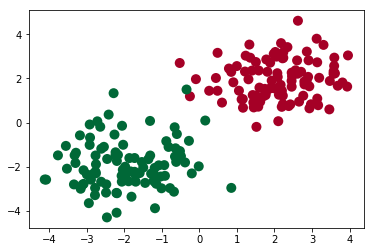

In [46]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)  #0标签
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)   #1标签
#print 'x0',
#print x0.size()  #(100L,2L)
#print 'x1',y0
 
x = torch.cat((x0,x1),dim=0).type(torch.FloatTensor)
y = torch.cat((y0,y1),).type(torch.LongTensor)
#print 'x:',x
#print 'y:',y
print (x.size())
print (y.size())
x,y = Variable(x),Variable(y)
 
plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y.data.numpy(),s=100,lw=0,cmap='RdYlGn')
plt.show()

In [43]:
class Net(nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = nn.Linear(n_feature,n_hidden)
        self.out = nn.Linear(n_hidden,n_output)
 
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x
 
net = Net(2,10,2)
print (net)

torch.Size([200, 2])
torch.Size([200])
Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


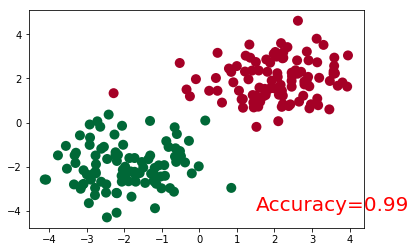

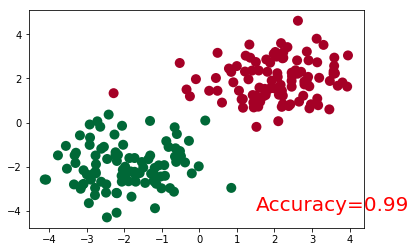

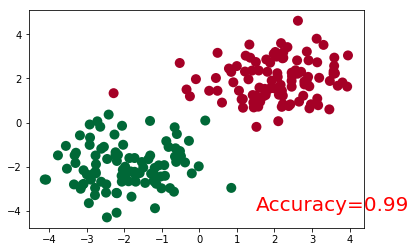

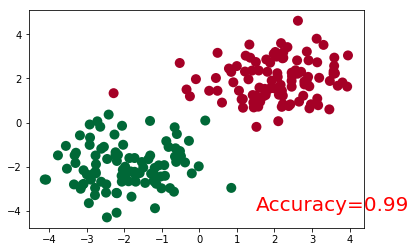

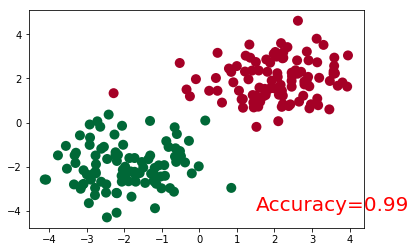

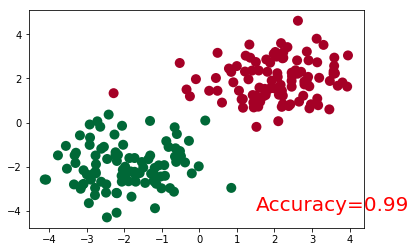

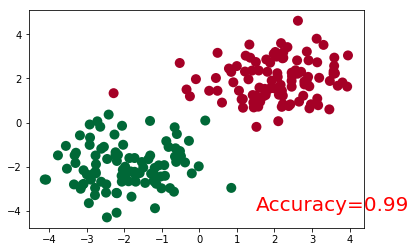

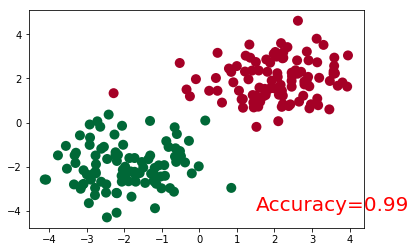

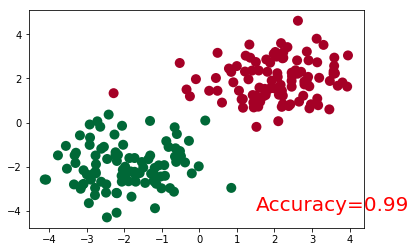

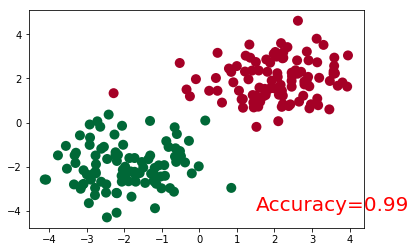

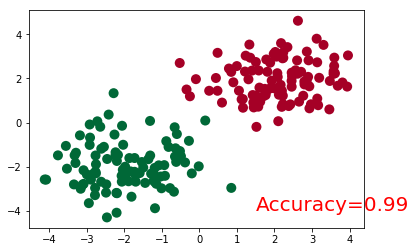

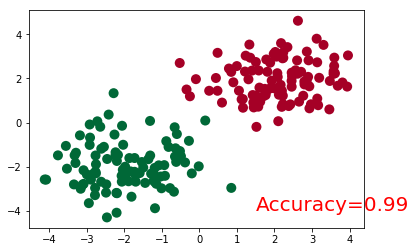

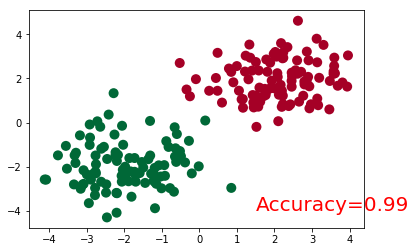

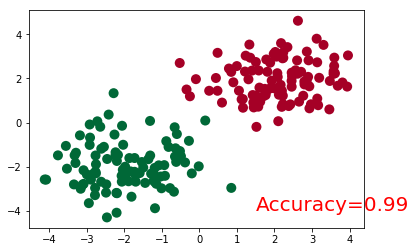

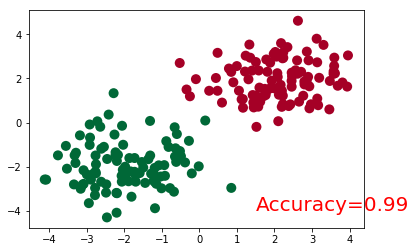

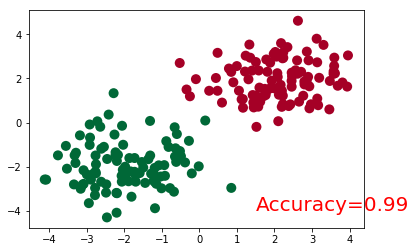

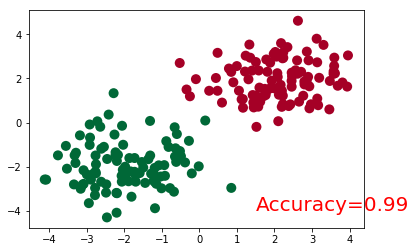

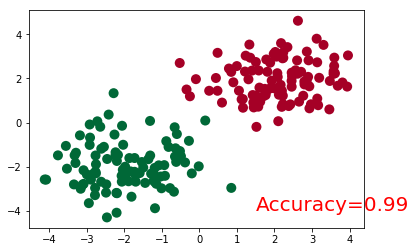

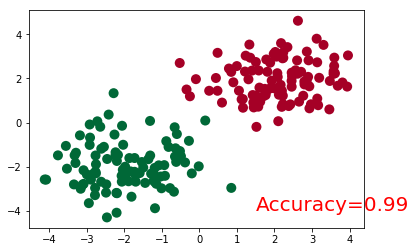

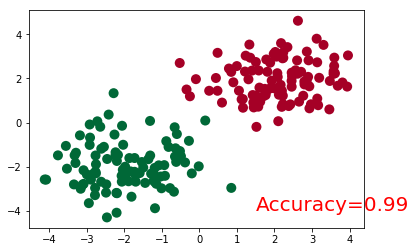

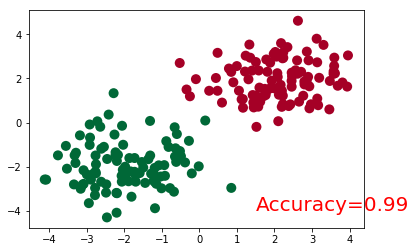

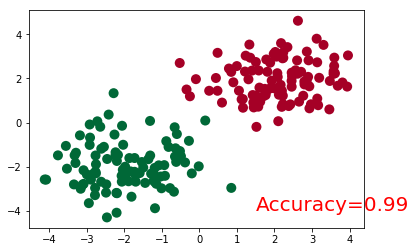

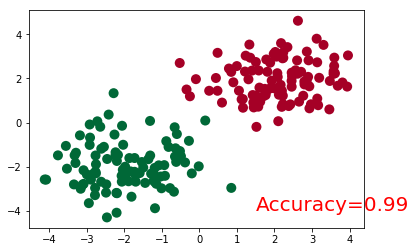

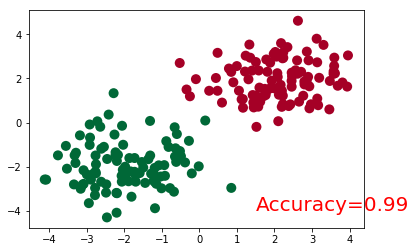

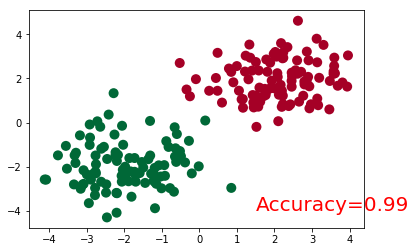

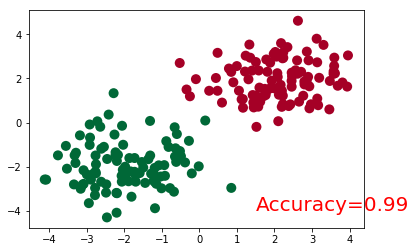

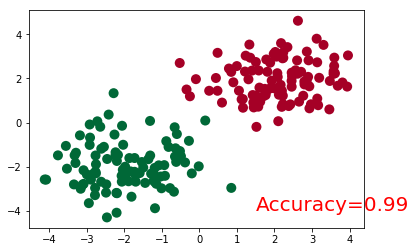

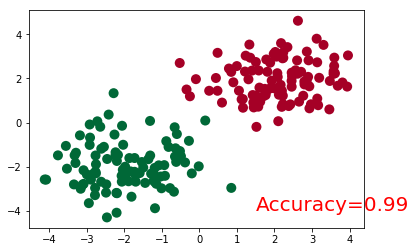

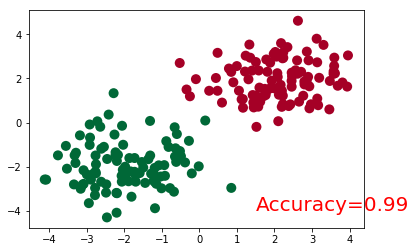

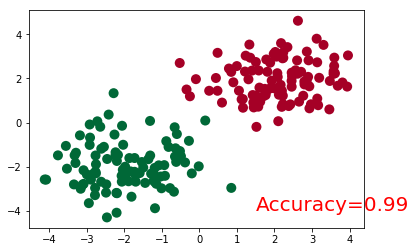

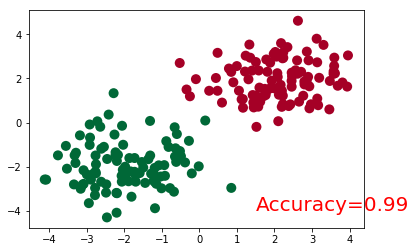

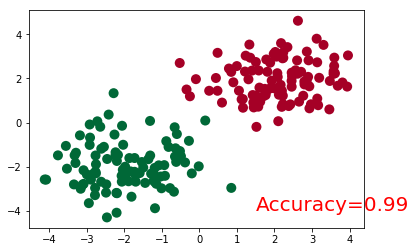

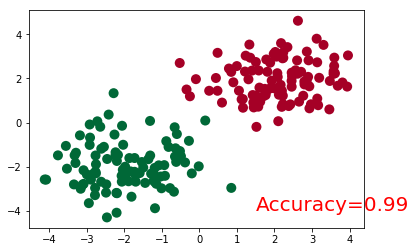

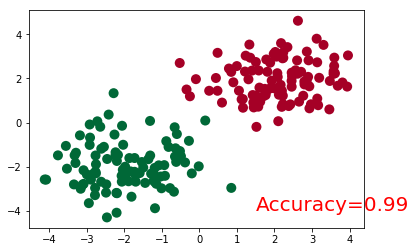

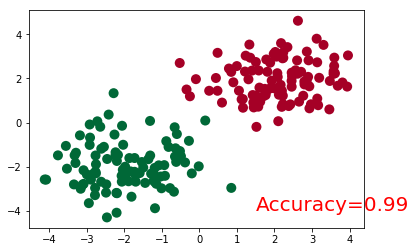

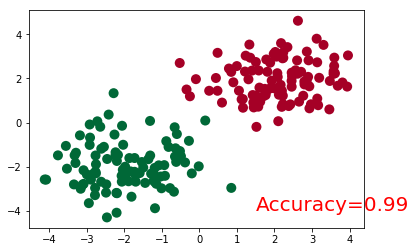

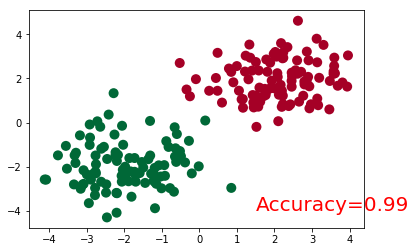

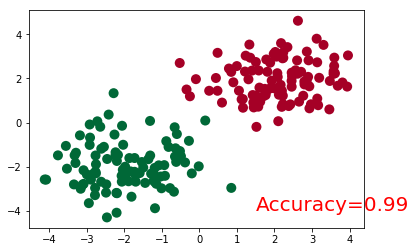

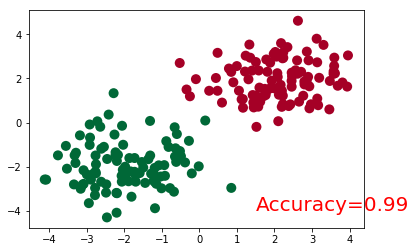

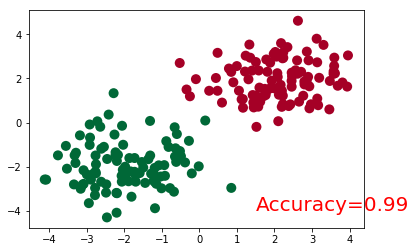

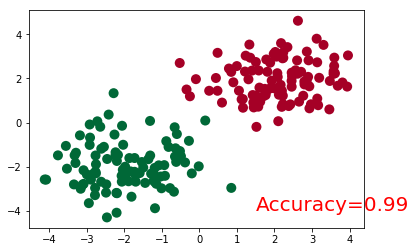

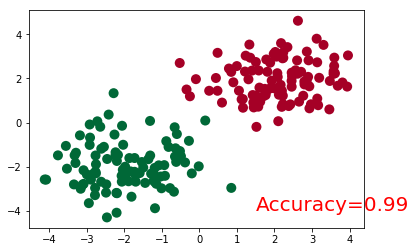

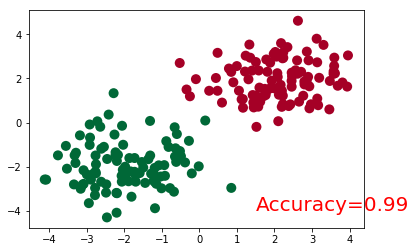

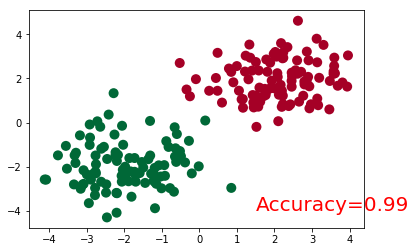

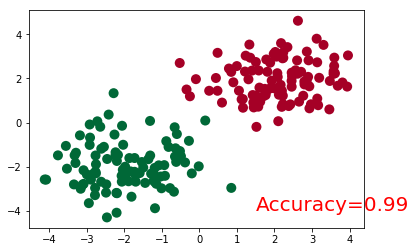

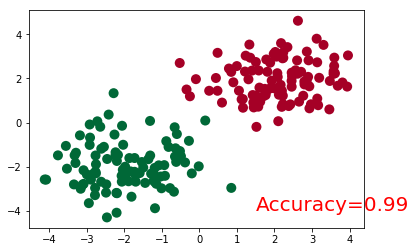

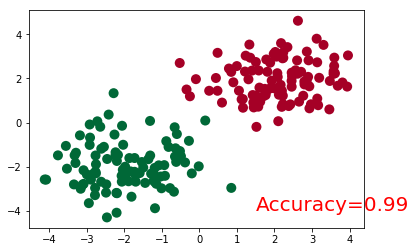

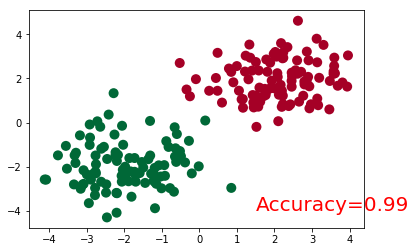

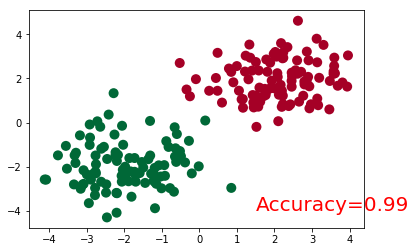

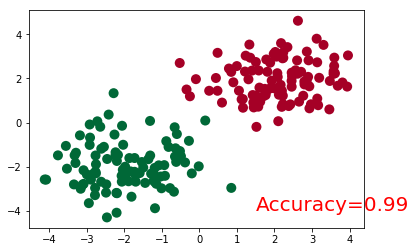

In [47]:
#训练网络
optimizer = torch.optim.SGD(net.parameters(),lr = 0.02)
loss_func = torch.nn.CrossEntropyLoss()
 
# for i in range(100):
#     out = net(x)
#     loss = loss_func(out,y)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
 
#可视化训练过程
plt.ion()
plt.show()
for i in range(100):
    out = net(x)
    loss = loss_func(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
    if i % 2 == 0:
        plt.cla()
        prediction = torch.max(F.softmax(out),1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y==target_y)/200
        plt.text(1.5,-4,'Accuracy=%.2f'%accuracy,fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
 
plt.ioff()
plt.show()

# CNN

In [52]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision      # 数据库模块
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [55]:
torch.manual_seed(1)    # reproducible
 
# Hyper Parameters
EPOCH = 1           # 训练整批数据多少次, 为了节约时间, 我们只训练一次
BATCH_SIZE = 50
LR = 0.001          # 学习率
DOWNLOAD_MNIST = False  # 如果你已经下载好了mnist数据就写上 Fasle
 
# Mnist 手写数字
train_data = torchvision.datasets.MNIST(
    root='./mnist/',    # 保存或者提取位置
    train=True,  # this is training data
    transform=torchvision.transforms.ToTensor(),    # 转换 PIL.Image or numpy.ndarray 成
                                                    # torch.FloatTensor (C x H x W), 训练的时候 normalize 成 [0.0, 1.0] 区间
    download=DOWNLOAD_MNIST,          # 没下载就下载, 下载了就不用再下了
)
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)

In [53]:
# 批训练 50samples, 1 channel, 28x28 (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
 
# 为了节约时间, 我们测试时只测试前2000个
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1),volatile = True).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
print (test_x)
test_y = test_data.test_labels[:2000]
print ('test_y:',test_y)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

### 搭建CNN

In [54]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(  # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,      # input height
                out_channels=16,    # n_filters
                kernel_size=5,      # filter size
                stride=1,           # filter movement/step
                padding=2,      # 如果想要 con2d 出来的图片长宽没有变化, padding=(kernel_size-1)/2 当 stride=1
            ),      # output shape (16, 28, 28)
            nn.ReLU(),    # activation
            nn.MaxPool2d(kernel_size=2),    # 在 2x2 空间里向下采样, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(  # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2),  # output shape (32, 14, 14)
            nn.ReLU(),  # activation
            nn.MaxPool2d(2),  # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes
 
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)   # 展平多维的卷积图成 (batch_size, 32 * 7 * 7)   x.size(0) 是x的行数 。  -1就是自适应大小
        output = self.out(x)
        return output
 
cnn = CNN()
print (cnn)  # net architecture

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted

In [50]:
# training and testing
for epoch in range(EPOCH):
    for step, (x,y) in enumerate(train_loader):   # 分配 batch data, normalize x when iterate train_loader
        b_x = Variable(x)   #版本老，所以tensor和Variable还没合并
        b_y = Variable(y)
        output = cnn(b_x)               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients
 
        if step % 50 == 0:
            test_output = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = float((pred_y == test_y).sum()) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

test_output = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

9920512it [00:07, 1241958.45it/s]                                                                                      


Extracting ./mnist/MNIST\raw\train-images-idx3-ubyte.gz


32768it [00:01, 31988.52it/s]                                                                                          


Extracting ./mnist/MNIST\raw\train-labels-idx1-ubyte.gz


1654784it [00:07, 223041.91it/s]                                                                                       


Extracting ./mnist/MNIST\raw\t10k-images-idx3-ubyte.gz


8192it [00:00, 13351.89it/s]                                                                                           


Extracting ./mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


D:\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
D:\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3105 | test accuracy: 0.06
Epoch:  0 | train loss: 0.6184 | test accuracy: 0.83
Epoch:  0 | train loss: 0.1270 | test accuracy: 0.87
Epoch:  0 | train loss: 0.2369 | test accuracy: 0.91
Epoch:  0 | train loss: 0.4052 | test accuracy: 0.93
Epoch:  0 | train loss: 0.0845 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1942 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1108 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1270 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0665 | test accuracy: 0.9

AttributeError: 'Tensor' object has no attribute 'ndim'

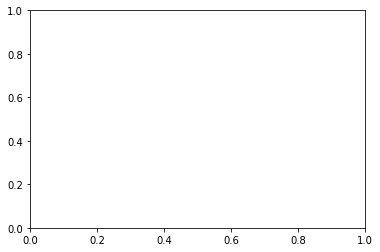

In [31]:
plt.plot(x,y)

# torch.max

In [59]:
import torch
from torch.autograd import Variable
 
#返回输入tensor中所有元素的最大值
a = torch.randn(1, 3)
print (a)
print (torch.max(a))
print ('--' * 10)
 
#按维度dim 返回最大值  torch.max)(a,0) 返回每一列中最大值的那个元素，且返回索引（返回最大元素在这一列的行索引）
b = torch.randn(3,3)
b = Variable(b)
print (b)
print (torch.max(b,0))
print ('--' * 10)
 
#torch.max(a,1) 返回每一行中最大值的那个元素，且返回其索引（返回最大元素在这一行的列索引）
print (torch.max(b,1))
 
print ('----' * 10)
print (torch.max(b,1)[0])   #只返回最大值
 
print ('----' * 10)
print (torch.max(b,1)[1])   #只返回最大值所在的索引

tensor([[-0.1955, -0.9656,  0.4224]])
tensor(0.4224)
--------------------
tensor([[ 0.2673, -0.4212, -0.5107],
        [-1.5727, -0.1232,  3.5870],
        [-1.8313,  1.5987, -1.2770]])
torch.return_types.max(
values=tensor([0.2673, 1.5987, 3.5870]),
indices=tensor([0, 2, 1]))
--------------------
torch.return_types.max(
values=tensor([0.2673, 3.5870, 1.5987]),
indices=tensor([0, 2, 1]))
----------------------------------------
tensor([0.2673, 3.5870, 1.5987])
----------------------------------------
tensor([0, 2, 1])


# RNN(分类)

In [6]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision      # 数据库模块
from torch.autograd import Variable

In [7]:
torch.manual_seed(1)    # reproducible
 
# Hyper Parameters超参数
EPOCH = 1           # 训练整批数据多少次, 为了节约时间, 我们只训练一次
BATCH_SIZE = 64
TIME_STEP = 28      # rnn 时间步数 / 图片高度
INPUT_SIZE = 28     # rnn 每步输入值 / 图片每行像素
LR = 0.01           # learning rate
DOWNLOAD_MNIST = False  # 如果你已经下载好了mnist数据就写上 Fasle
 
 
# Mnist 手写数字
train_data = torchvision.datasets.MNIST(
    root='./mnist/',    # 保存或者提取位置
    train=True,  # this is training data
    transform=torchvision.transforms.ToTensor(),    # 转换 PIL.Image or numpy.ndarray 成
                                                    # torch.FloatTensor (C x H x W), 训练的时候 normalize 成 [0.0, 1.0] 区间
    download=DOWNLOAD_MNIST,          # 没下载就下载, 下载了就不用再下了
)
 
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
 
# 批训练 50samples, 1 channel, 28x28 (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
 
# 为了节约时间, 我们测试时只测试前2000个
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

In [8]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
 
        self.rnn = nn.LSTM(     # LSTM 效果要比 nn.RNN() 好多了
            input_size=INPUT_SIZE,      # 图片每行的数据像素点
            hidden_size=64,     # rnn hidden unit
            num_layers=1,       # 有几层 RNN layers
            batch_first=True,   # input & output 会是以 batch size 为第一维度的特征集 e.g. (batch, time_step, input_size)
        )
 
        self.out = nn.Linear(64, 10)    # 输出层
 
    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)   LSTM 有两个 hidden states, h_n 是分线, h_c 是主线
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None 表示 hidden state 会用全0的 state
 
        # 选取最后一个时间点的 r_out 输出
        # 这里 r_out[:, -1, :] 的值也是 h_n 的值
        out = self.out(r_out[:, -1, :])
        return out
 
rnn = RNN()
print (rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [9]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted

In [10]:
# training and testing
for epoch in range(EPOCH):
    for step, (x, b_y) in enumerate(train_loader):   # gives batch data
        x = Variable(x)
        b_y = Variable(b_y)
        b_x = x.view(-1, 28, 28)   # reshape x to (batch, time_step, input_size)
 
        output = rnn(b_x)               # rnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients
 
 
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 6 9] prediction number
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]) real number


# RNN（分类）GPU

In [12]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision      # 数据库模块
from torch.autograd import Variable
import time

In [13]:
time_start=time.time()
torch.manual_seed(1)    # reproducible
 
# Hyper Parameters
EPOCH = 1           # 训练整批数据多少次, 为了节约时间, 我们只训练一次
BATCH_SIZE = 64
TIME_STEP = 28      # rnn 时间步数 / 图片高度
INPUT_SIZE = 28     # rnn 每步输入值 / 图片每行像素
LR = 0.01           # learning rate
DOWNLOAD_MNIST = False  # 如果你已经下载好了mnist数据就写上 Fasle

# Mnist 手写数字
train_data = torchvision.datasets.MNIST(
    root='./mnist/',    # 保存或者提取位置
    train=True,  # this is training data
    transform=torchvision.transforms.ToTensor(),    # 转换 PIL.Image or numpy.ndarray 成
                                                    # torch.FloatTensor (C x H x W), 训练的时候 normalize 成 [0.0, 1.0] 区间
    download=DOWNLOAD_MNIST,          # 没下载就下载, 下载了就不用再下了
)

test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
 
# 批训练 50samples, 1 channel, 28x28 (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# 为了节约时间, 我们测试时只测试前2000个
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000].cuda()/255.   
# shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000].cuda()

In [15]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
 
        self.rnn = nn.LSTM(     # LSTM 效果要比 nn.RNN() 好多了
            input_size=INPUT_SIZE,      # 图片每行的数据像素点
            hidden_size=64,     # rnn hidden unit
            num_layers=1,       # 有几层 RNN layers
            batch_first=True,   # input & output 会是以 batch size 为第一维度的特征集 e.g. (batch, time_step, input_size)
        )
 
        self.out = nn.Linear(64, 10)    # 输出层
 
    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)   LSTM 有两个 hidden states, h_n 是分线, h_c 是主线
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None 表示 hidden state 会用全0的 state,表示没有第一个h
 
        # 选取最后一个时间点的 r_out 输出
        # 这里 r_out[:, -1, :] 的值也是 h_n 的值
        out = self.out(r_out[:, -1, :])  #最后一个时刻的选取
        return out
 
rnn = RNN()
rnn.cuda()    #模型使用了cuda()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [16]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted

In [17]:
# training and testing
for epoch in range(EPOCH):
    for step, (x, b_y) in enumerate(train_loader):   # gives batch data
        x = Variable(x).cuda()
        b_y = Variable(b_y).cuda()     #训练数据使用了cuda（）
        b_x = x.view(-1, 28, 28)   # reshape x to (batch, time_step, input_size)
 
        output = rnn(b_x)               # rnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].cpu().data.numpy().squeeze()   #得转换为cpu（）,不然出现：can't convert CUDA tensor to numpy (it doesn't support GPU arrays). Use .cpu() to move the tensor to host memory first.
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

time_end=time.time()
print('time cost',time_end-time_start,'s')

[7 2 1 0 4 1 4 9 5 9] prediction number
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], device='cuda:0') real number
time cost 261.020117521286 s


# RNN（回归）

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [2]:
torch.manual_seed(1)    # reproducible
 
# Hyper Parameters
TIME_STEP = 10      # rnn time step / image height
INPUT_SIZE = 1      # rnn input size / image width
LR = 0.02           # learning rate
DOWNLOAD_MNIST = False  # set to True if haven't download the data

In [3]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
 
        self.rnn = nn.RNN(  # 这回一个普通的 RNN 就能胜任
            input_size=1,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # 有几层 RNN layers
            batch_first=True,   # input & output 会是以 batch size 为第一维度的特征集 e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)
 
    def forward(self, x, h_state):  # 因为 hidden state 是连续的, 所以我们要一直传递这一个 state
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, output_size)
        r_out, h_state = self.rnn(x, h_state)   # h_state 也要作为 RNN 的一个输入
 
        outs = []    # 保存所有时间点的预测值
        for time_step in range(r_out.size(1)):    # 对每一个时间点计算 output
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state
 
 
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [5]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all rnn parameters
loss_func = nn.MSELoss()
 
h_state = None   # 要使用初始 hidden state, 可以设成 None
 
plt.figure(1, figsize=(12, 5))
plt.ion()

<Figure size 864x360 with 0 Axes>

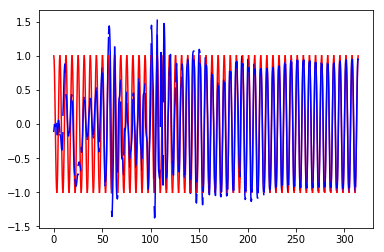

KeyboardInterrupt: 

In [6]:
for step in range(100):
    start, end = step * np.pi, (step+1)*np.pi   # time steps
    # sin 预测 cos
    steps = np.linspace(start, end, 10, dtype=np.float32)
    x_np = np.sin(steps)    # float32 for converting torch FloatTensor
    y_np = np.cos(steps)
 
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
 
    x = Variable(x)
    y = Variable(y)
 
    prediction, h_state = rnn(x, h_state)   # rnn 对于每个 step 的 prediction, 还有最后一个 step 的 h_state
    # !!  下一步十分重要 !!
    h_state = Variable(h_state.data)  # 要把 h_state 重新包装一下才能放入下一个 iteration, 不然会报错
 
    loss = loss_func(prediction, y)     # cross entropy loss
    optimizer.zero_grad()               # clear gradients for this training step
    loss.backward()                     # backpropagation, compute gradients
    optimizer.step()                    # apply gradients
 
    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
plt.draw()
plt.pause(0)